Overall Metrics:
accuracy: 0.433
macro_precision: 0.288
macro_recall: 0.347
macro_f1: 0.308

First few rows of the results:
        doc_id      section                              claim_id  \
0  NCT02756364  Eligibility  c2c73b99-f89c-4dd3-8362-295f9a7965f3   
1  NCT02756364  Eligibility  0046e113-8ac5-4725-a285-e78b8c26f825   
2  NCT00550771  Eligibility  e6a4e9a6-56b8-4a30-9743-eb02688c090f   
3  NCT00550771  Eligibility  016943fa-57ea-4293-8131-03292ea1836c   
4  NCT00723398  Eligibility  d375ef3f-8b35-40eb-b9c0-3fc9592d9bec   

                                          claim_text     pred_label  \
0  In order to meet the inclusion criteria for th...  contradiction   
1  In order to meet the inclusion criteria for th...     entailment   
2  A patient with a node positive T2 N2 M0 adenoc...     entailment   
3  A patient with a node positive T2 N2 M0 adenoc...     entailment   
4  Patients with both type 1 and 2 Diabetes are n...     entailment   

      gold_label                  

<Figure size 1000x500 with 0 Axes>

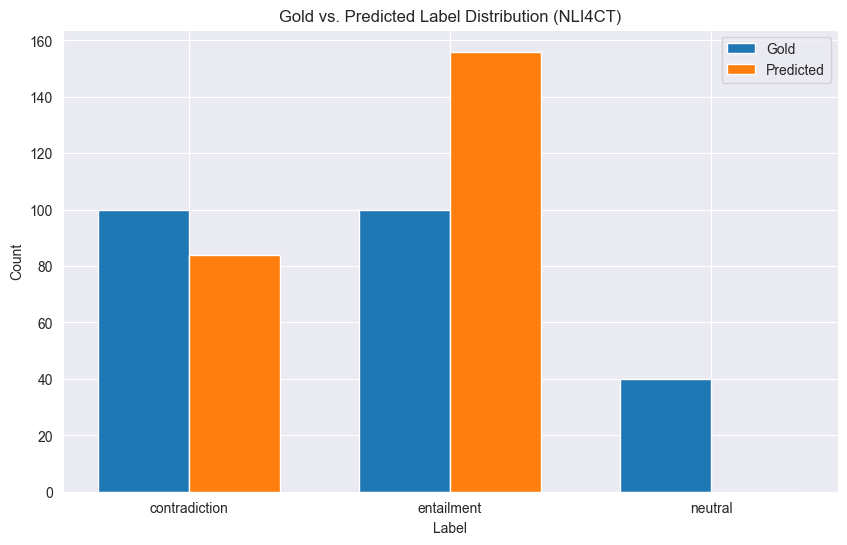

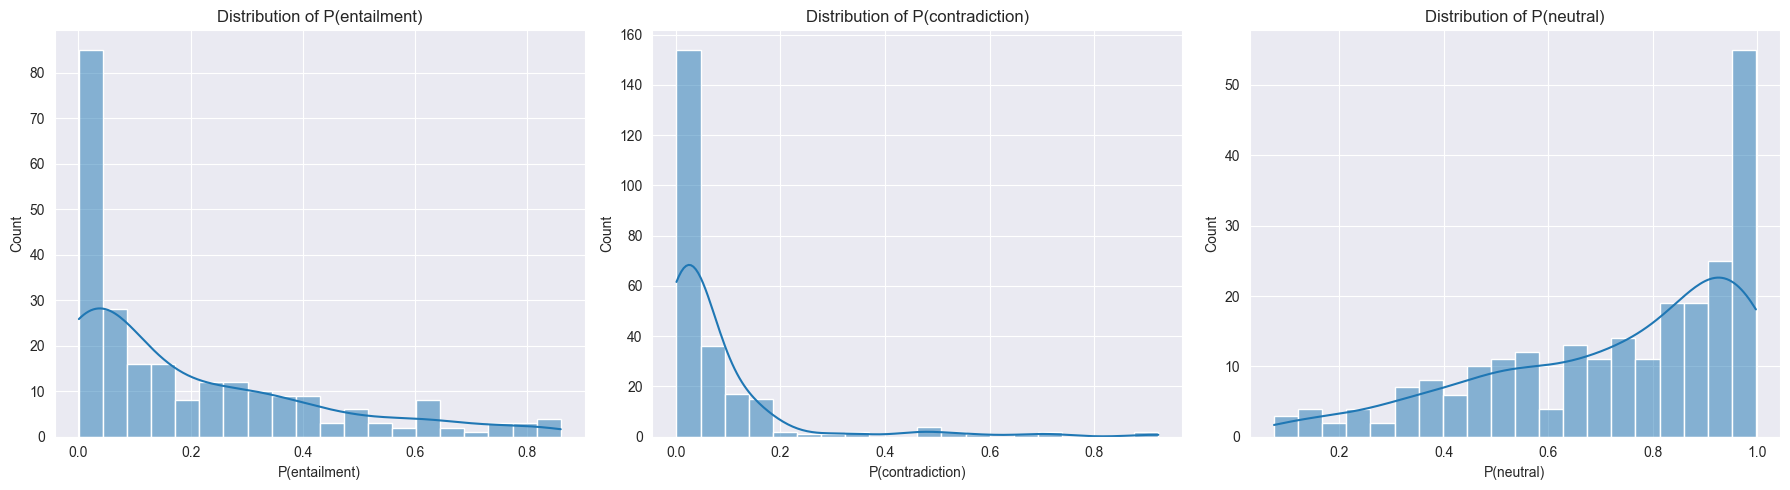

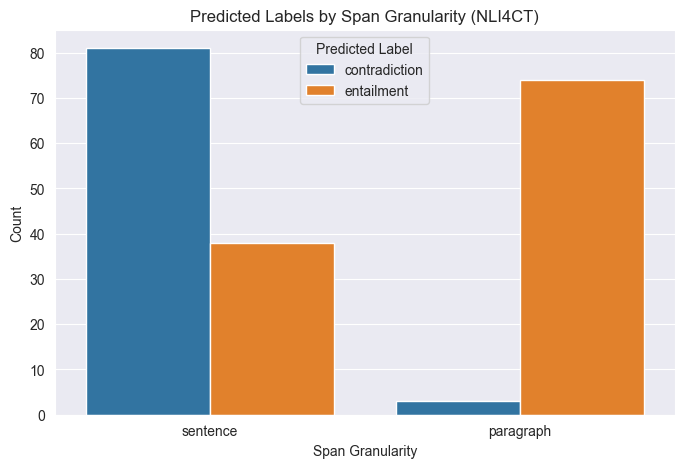

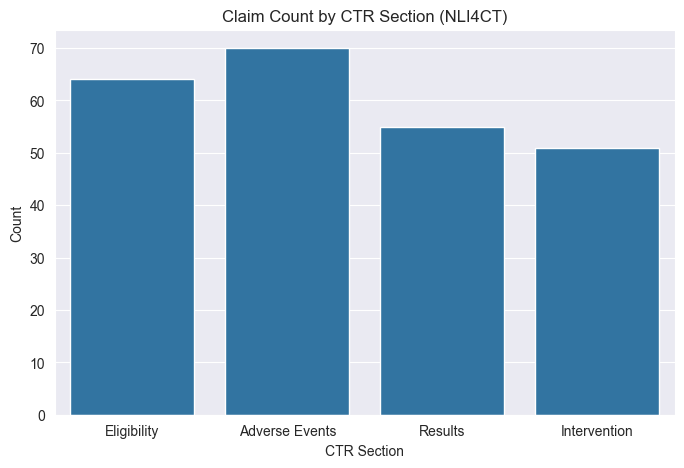

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- CONFIGURATION -------------------
# Path to the NLI4CT results JSON file.
RESULTS_FILE = "nli4ct_verification_results.json"
# -----------------------------------------------------

# Load the results JSON file
with open(RESULTS_FILE, "r", encoding="utf-8") as f:
    results_data = json.load(f)

# Extract overall metrics (if stored) and per-claim results.
metrics = results_data.get("metrics", {})
results = results_data.get("results", [])

print("Overall Metrics:")
for key, value in metrics.items():
    print(f"{key}: {value:.3f}")

# Convert results to a DataFrame for analysis
df = pd.DataFrame(results)
print("\nFirst few rows of the results:")
print(df.head())

# -----------------------------------------------------
# Plot: Side-by-side distribution of Gold vs. Predicted Labels
plt.figure(figsize=(10, 5))
gold_counts = df["gold_label"].value_counts().sort_index()
pred_counts = df["pred_label"].value_counts().sort_index()

# Compute labels from union of gold and predicted labels
labels = sorted(set(gold_counts.index) | set(pred_counts.index))
gold_values = [gold_counts.get(label, 0) for label in labels]
pred_values = [pred_counts.get(label, 0) for label in labels]

x = range(len(labels))
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, gold_values, width, label='Gold')
ax.bar([p + width for p in x], pred_values, width, label='Predicted')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(labels)
ax.set_xlabel("Label")
ax.set_ylabel("Count")
ax.set_title("Gold vs. Predicted Label Distribution (NLI4CT)")
ax.legend()
plt.show()

# -----------------------------------------------------
# Plot: Distributions of p_entail, p_contr, and p_neut
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["p_entail"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Distribution of P(entailment)")
axes[0].set_xlabel("P(entailment)")

sns.histplot(df["p_contr"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Distribution of P(contradiction)")
axes[1].set_xlabel("P(contradiction)")

sns.histplot(df["p_neut"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Distribution of P(neutral)")
axes[2].set_xlabel("P(neutral)")
plt.tight_layout()
plt.show()

# -----------------------------------------------------
# Plot: Correlation between predicted labels and span granularity
if "span_granularity" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="span_granularity", hue="pred_label", data=df, order=["sentence", "paragraph"])
    plt.title("Predicted Labels by Span Granularity (NLI4CT)")
    plt.xlabel("Span Granularity")
    plt.ylabel("Count")
    plt.legend(title="Predicted Label")
    plt.show()
else:
    print("Column 'span_granularity' not found in the DataFrame.")

# -----------------------------------------------------
# Additional Insight: Distribution of claims across different sections
if "section" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="section", data=df)
    plt.title("Claim Count by CTR Section (NLI4CT)")
    plt.xlabel("CTR Section")
    plt.ylabel("Count")
    plt.show()
else:
    print("Column 'section' not found in the DataFrame.")